<a href="https://colab.research.google.com/github/ravitata/tflite/blob/main/object_detection/object_detection_cow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

print('GPU name: {}'.format(tf.test.gpu_device_name()))

2.4.1
GPU name: /device:GPU:0


In [2]:
import os
import pathlib

#TensorFlow Object Detection API Installation
https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html#tensorflow-object-detection-api-installation

In [3]:
#FYI - the left pane structure:  /content/sample_data
print(pathlib.Path.cwd())

print(pathlib.Path.cwd().parts)

/content
('/', 'content')


In [4]:
#!rm -rf models
%%bash
mkdir mytf
cd mytf
pwd


/content/mytf


In [5]:
!rm -rf models

In [6]:
if "models" in pathlib.Path.cwd().parts:
  print('models')
elif not pathlib.Path('models').exists():
  print('no models')
  !git clone --depth 1 https://github.com/tensorflow/models
  !mv models mytf/models

no models
Cloning into 'models'...
remote: Enumerating objects: 2465, done.
remote: Counting objects: 100% (2465/2465), done.
remote: Compressing objects: 100% (2047/2047), done.
remote: Total 2465 (delta 606), reused 1281 (delta 390), pack-reused 0
Receiving objects: 100% (2465/2465), 30.86 MiB | 36.79 MiB/s, done.
Resolving deltas: 100% (606/606), done.


In [7]:
!pwd

/content


In [8]:
# Install the Object Detection API
%%bash
cd mytf/models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .


Processing /content/mytf/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1629193 sha256=c0373b6611bd24d5a22970d860728fe57fbd39429ea839ddd0c6255487aa2cc7
  Stored in directory: /tmp/pip-ephem-wheel-cache-1z6yhhe4/wheels/cd/8f/1f/240578889c34afc471e741793c20a79ce652d94ea5e071fb2c
  Created wheel for avro-python3: filename=avro_python3-1.10.2-cp37-none-any.whl size=44011 sha256=41d0b1376e5cfcccd6b93ac344eb3207b22bd47f167e9e99b5b35528cda67514
  Stored in directory: /root/.cache/pip/wheels/ee/ee/18/c466221ca6900e3efce2f4ea9c329288808679aecdcb2838d3
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=442f636d018f81a0c05ddae90762eff91c179c8c01ea283bf059301193f5e054
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for dill: filename=dill-0.3.1.1-cp37-none-any.whl size=78532 sha256=38d38757f03523af54166a389fe3a6dab2343574bf5bfb1

ERROR: multiprocess 0.70.11.1 has requirement dill>=0.3.3, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.28.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you'll have avro-python3 1.10.2 which is incompatible.


##Test your Installation

In [9]:
%%bash
cd mytf/models/research/
pwd
# From within TensorFlow/models/research/
python object_detection/builders/model_builder_tf2_test.py

/content/mytf/models/research


2021-03-24 02:00:22.083691: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2021-03-24 02:00:24.654363: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-24 02:00:24.655446: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-24 02:00:24.662458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-24 02:00:24.663136: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB devi

In [10]:
%%bash
cd mytf
mkdir workspace
cd workspace
mkdir training_demo
pwd


/content/mytf/workspace


In [11]:
%%bash
pwd 
cd /content/mytf/workspace
cd training_demo
mkdir annotations
mkdir exported-models
mkdir images
mkdir images/train
mkdir images/test
mkdir models
mkdir pre-trained-models

/content


In [21]:
%%bash
pwd
cd /content/mytf/workspace
mkdir scripts
mkdir scripts/preprocessing

/content


###Upload the image files and xmls (jpeg and annotated xml) files into the 'train' and 'test' manually

In [26]:
%%bash
cd /content/mytf/workspace/scripts/preprocessing
python generate_tfrecord.py -x /content/mytf/workspace/training_demo/images/train -l /content/mytf/workspace/training_demo/annotations/label_map.pbtxt -o /content/mytf/workspace/training_demo/annotations/train.record
python generate_tfrecord.py -x /content/mytf/workspace/training_demo/images/test -l /content/mytf/workspace/training_demo/annotations/label_map.pbtxt -o /content/mytf/workspace/training_demo/annotations/test.record

Traceback (most recent call last):
  File "generate_tfrecord.py", line 168, in <module>
    run()
NameError: name 'run' is not defined
Traceback (most recent call last):
  File "generate_tfrecord.py", line 168, in <module>
    run()
NameError: name 'run' is not defined


##Create Tensorflow Records

In [12]:
import os
import glob
import pandas as pd
import io
import xml.etree.ElementTree as ET
import argparse

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import tensorflow.compat.v1 as tf
from PIL import Image
from object_detection.utils import dataset_util, label_map_util
from collections import namedtuple

def xml_to_csv(path):
    """Iterates through all .xml files (generated by labelImg) in a given directory and combines
    them in a single Pandas dataframe.

    Parameters:
    ----------
    path : str
        The path containing the .xml files
    Returns
    -------
    Pandas DataFrame
        The produced dataframe
    """

    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def class_text_to_int(row_label):
    return label_map_dict[row_label]


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

In [13]:
def my_main(xml_dir, labels_path, output_path, csv_path=None):
    writer = tf.python_io.TFRecordWriter(output_path)
    path = os.path.join(image_dir)
    examples = xml_to_csv(xml_dir)
    grouped = split(examples, 'filename')
    for group in grouped:
        tf_example = create_tf_example(group, path)
        writer.write(tf_example.SerializeToString())
    writer.close()
    print('Successfully created the TFRecord file: {}'.format(output_path))
    if csv_path is not None:
        examples.to_csv(csv_path, index=None)
        print('Successfully created the CSV file: {}'.format(csv_path))


In [14]:
xml_dir = '/content/mytf/workspace/training_demo/images/train'
labels_path = '/content/mytf/workspace/training_demo/annotations/label_map.pbtxt'
output_path = '/content/mytf/workspace/training_demo/annotations/train.record'
image_dir = xml_dir

label_map = label_map_util.load_labelmap(labels_path)
label_map_dict = label_map_util.get_label_map_dict(label_map)
my_main(xml_dir, labels_path, output_path, None)

Successfully created the TFRecord file: /content/mytf/workspace/training_demo/annotations/train.record


In [15]:
xml_dir = '/content/mytf/workspace/training_demo/images/test'
labels_path = '/content/mytf/workspace/training_demo/annotations/label_map.pbtxt'
output_path = '/content/mytf/workspace/training_demo/annotations/test.record'
image_dir = xml_dir

label_map = label_map_util.load_labelmap(labels_path)
label_map_dict = label_map_util.get_label_map_dict(label_map)
my_main(xml_dir, labels_path, output_path, None)

Successfully created the TFRecord file: /content/mytf/workspace/training_demo/annotations/test.record


##Download a pre-trainined model
from https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

In [16]:
# Download and extract model
def download_model(model_name, model_date):
    base_url = 'http://download.tensorflow.org/models/object_detection/tf2/'
    model_file = model_name + '.tar.gz'
    model_dir = tf.keras.utils.get_file(fname=model_name,
                                        origin=base_url + model_date + '/' + model_file,
                                        untar=True)
    return str(model_dir)

MODEL_DATE = '20200711'
MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PATH_TO_MODEL_DIR = download_model(MODEL_NAME, MODEL_DATE)

20520960/20515344 [==============================] - 0s 0us/step


In [17]:
print(PATH_TO_MODEL_DIR)

/root/.keras/datasets/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8


Moving the download pre-trained model to workspace area

In [18]:
!mv /root/.keras/datasets/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 /content/mytf/workspace/training_demo/pre-trained-models

##Configure the Training Pipeline

In [20]:
#Create a directory for the training job and
#copy the pipeline.config to the above folder
%%bash
cd /content/mytf/workspace/training_demo/models/
mkdir my_mobilenet_v2_fpnlite

cd my_mobilenet_v2_fpnlite
cp /content/mytf/workspace/training_demo/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config .

mkdir: cannot create directory ‘my_mobilenet_v2_fpnlite’: File exists


## Do the changes to above pipeline.config  (changes are downloaded)

In [21]:
#copy the training script to the workspace/training_demo folder
!cp /content/mytf/models/research/object_detection/model_main_tf2.py /content/mytf/workspace/training_demo

In [61]:
%%bash
cd /content/mytf/workspace/training_demo
python model_main_tf2.py \
     --model_dir=/content/mytf/workspace/training_demo/models/my_mobilenet_v2_fpnlite \
     --pipeline_config_path=/content/mytf/workspace/training_demo/models/my_mobilenet_v2_fpnlite/pipeline.config

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0324 04:37:13.308863 139848399234944 mirrored_strategy.py:350] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0324 04:37:13.312979 139848399234944 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0324 04:37:13.313135 139848399234944 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I0324 04:37:13.446127 139848399234944 cross_device_ops.py:565] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/de

#Exporting a Trained Model

In [28]:
!cp /content/mytf/models/research/object_detection/exporter_main_v2.py \
    /content/mytf/workspace/training_demo

In [62]:
%%bash
cd /content/mytf/workspace/training_demo
python exporter_main_v2.py \
    --input_type image_tensor \
    --pipeline_config_path /content/mytf/workspace/training_demo/models/my_mobilenet_v2_fpnlite/pipeline.config \
    --trained_checkpoint_dir /content/mytf/workspace/training_demo/models/my_mobilenet_v2_fpnlite \
    --output_directory /content/mytf/workspace/training_demo/exported-models/my_model

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0324 04:46:26.980039 139941387007872 deprecation.py:604] From /usr/local/lib/python3.7/dist-packages/object_detection/exporter_lib_v2.py:106: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0324 04:46:41.142949 139941387007872 save_impl.py:78] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7f46300be8d0>, because it is not built.
W0324 04:46:41.935998 139941387007872 save

#Object Detection From TF2 Saved Model

In [31]:
#Download the test images
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf

tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

def download_images():
    base_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/'
    filenames = ['image1.jpg', 'image2.jpg']
    image_paths = []
    for filename in filenames:
        image_path = tf.keras.utils.get_file(fname=filename,
                                            origin=base_url + filename,
                                            untar=False)
        image_path = pathlib.Path(image_path)
        image_paths.append(str(image_path))
    return image_paths

IMAGE_PATHS = download_images()

1417216/1415684 [==============================] - 0s 0us/step


In [32]:
print(IMAGE_PATHS)

['/root/.keras/datasets/image1.jpg', '/root/.keras/datasets/image2.jpg']


In [77]:
IMAGE_PATHS = ['/content/mytf/workspace/training_demo/images/train/cow3.jpeg', '/content/mytf/workspace/training_demo/images/train/cow4.jpeg', '/content/mytf/workspace/training_demo/images/test/cow7.jpeg']
print(IMAGE_PATHS)

['/content/mytf/workspace/training_demo/images/train/cow3.jpeg', '/content/mytf/workspace/training_demo/images/train/cow4.jpeg', '/content/mytf/workspace/training_demo/images/test/cow7.jpeg']


##Download the model

In [47]:
print(PATH_TO_MODEL_DIR)

/content/mytf/workspace/training_demo/exported-models/my_model


In [64]:
PATH_TO_MODEL_DIR = '/content/mytf/workspace/training_demo/exported-models/my_model'
print(PATH_TO_MODEL_DIR)

/content/mytf/workspace/training_demo/exported-models/my_model


##Download the labels

In [35]:
# Download labels file
def download_labels(filename):
    base_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/'
    label_dir = tf.keras.utils.get_file(fname=filename,
                                        origin=base_url + filename,
                                        untar=False)
    label_dir = pathlib.Path(label_dir)
    return str(label_dir)

LABEL_FILENAME = 'mscoco_label_map.pbtxt'
PATH_TO_LABELS = download_labels(LABEL_FILENAME)

8192/5056 [================================================] - 0s 0us/step


In [36]:
print(PATH_TO_LABELS)

/root/.keras/datasets/mscoco_label_map.pbtxt


In [65]:
PATH_TO_LABELS = '/content/mytf/workspace/training_demo/annotations/label_map.pbtxt'
print(PATH_TO_LABELS)

/content/mytf/workspace/training_demo/annotations/label_map.pbtxt


##Load the model
Next we load the downloaded model

In [66]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"
print('Model Path= '+PATH_TO_SAVED_MODEL)
print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Model Path= /content/mytf/workspace/training_demo/exported-models/my_model/saved_model
Loading model...Done! Took 11.336524248123169 seconds


##Load label map data (for plotting)

In [67]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

In [68]:
print(category_index)

{1: {'id': 1, 'name': 'cow'}}


##Putting everything together

Running inference for /content/mytf/workspace/training_demo/images/train/cow3.jpeg... Done
Running inference for /content/mytf/workspace/training_demo/images/train/cow4.jpeg... Done
Running inference for /content/mytf/workspace/training_demo/images/test/cow7.jpeg... Done


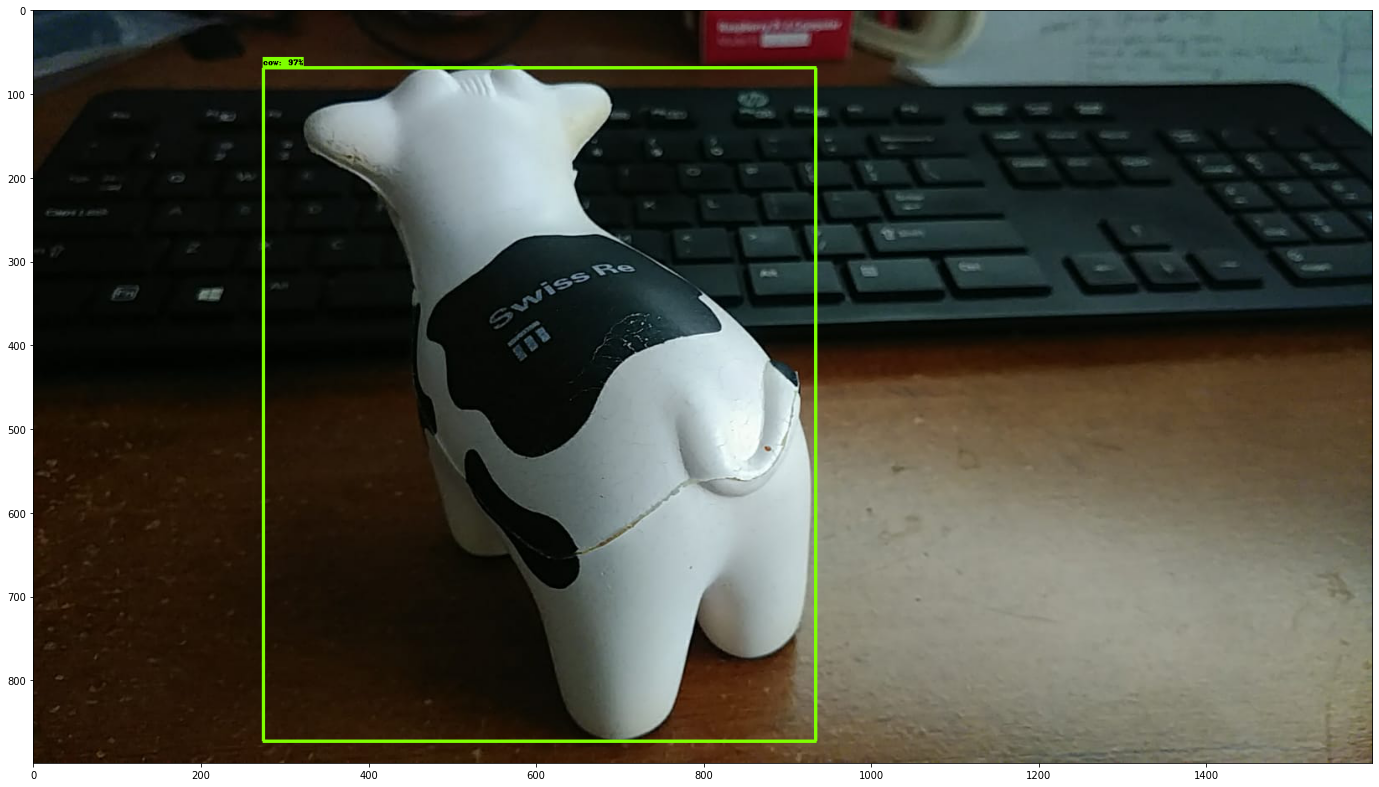

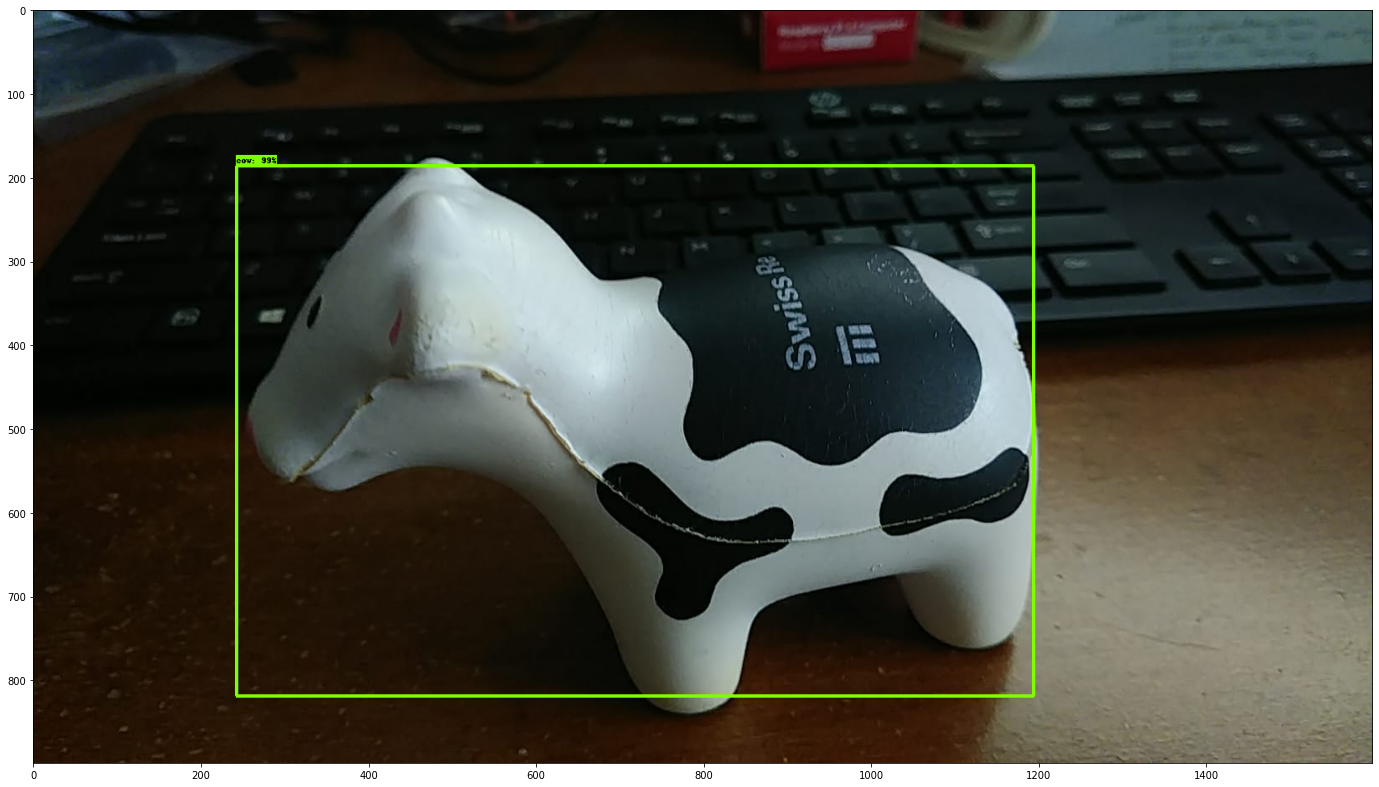

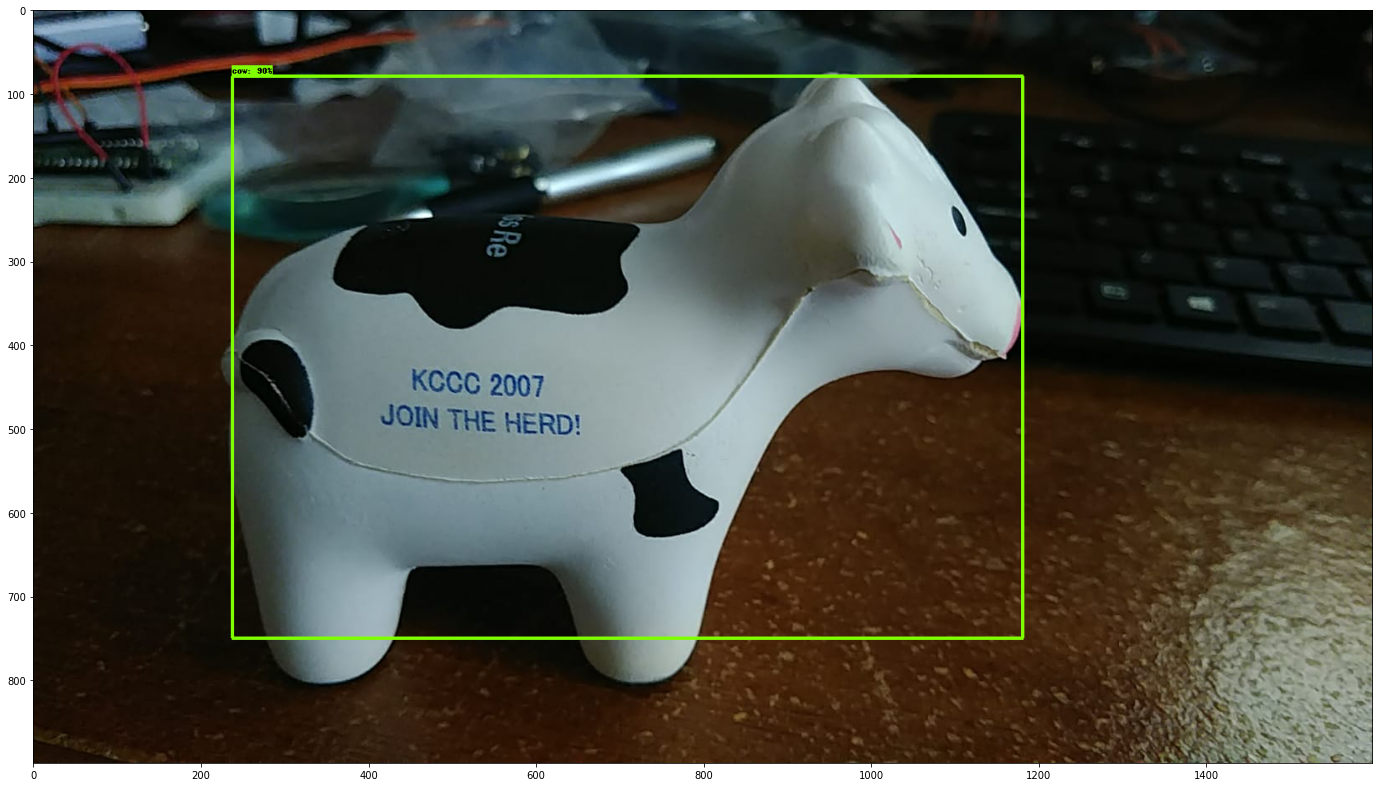

In [78]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    #print(detections['detection_scores'])
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.3,
          agnostic_mode=False)

    plt.figure(figsize=[24,18])
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2

#Export & run with TensorFlow Lite

In [82]:
#Model Conversion
#First, we invoke the export_tflite_graph_tf2.py script to generate a TFLite-friendly intermediate SavedModel. This will then be passed to the TensorFlow Lite Converter for generating the final model.

%%bash
cp /content/mytf/models/research/object_detection/export_tflite_graph_tf2.py \
   /content/mytf/workspace/training_demo

cd /content/mytf/workspace/training_demo

python export_tflite_graph_tf2.py \
  --pipeline_config_path /content/mytf/workspace/training_demo/exported-models/my_model/pipeline.config \
  --trained_checkpoint_dir /content/mytf/workspace/training_demo/exported-models/my_model/checkpoint \
  --output_directory /content/mytf/workspace/training_demo/exported-models/mytflite

W0324 05:09:05.618532 140415380477824 save_impl.py:78] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7fb4a1175e90>, because it is not built.
W0324 05:09:06.589273 140415380477824 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x7fb442b54790>, because it is not built.
W0324 05:09:06.589534 140415380477824 save_impl.py:78] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7fb442bb8250>, because it is not built.
W0324 05:09:06.589664 140415380477824 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x7fb442bb8490>, because it is not built.
W0324 05:09:06.589777 140415380477824 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.convolutional.SeparableConv2D object a

In [83]:
!tflite_convert --saved_model_dir=/content/mytf/workspace/training_demo/exported-models/mytflite/saved_model --output_file=/content/mytf/workspace/training_demo/exported-models/mytflite/model.tflite

#Test .tflite model

In [100]:
def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
  """Wrapper function to visualize detections.

  Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
  """
  image_np_with_annotations = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.8)
  if image_name:
    plt.imsave(image_name, image_np_with_annotations)
  else:
    plt.imshow(image_np_with_annotations)

In [102]:
test_image_dir = '/content/mytf/workspace/training_demo/images/test'
test_images_np = []
for i in range(7, 8):
  image_path = os.path.join(test_image_dir, 'cow' + str(i) + '.jpeg')
  test_images_np.append(np.expand_dims(
      load_image_into_numpy_array(image_path), axis=0))

# Again, uncomment this decorator if you want to run inference eagerly
def detect(interpreter, input_tensor):
  """Run detection on an input image.

  Args:
    interpreter: tf.lite.Interpreter
    input_tensor: A [1, height, width, 3] Tensor of type tf.float32.
      Note that height and width can be anything since the image will be
      immediately resized according to the needs of the model within this
      function.

  Returns:
    A dict containing 3 Tensors (`detection_boxes`, `detection_classes`,
      and `detection_scores`).
  """
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()

  print(input_details)
  print(input_tensor.shape)

  # We use the original model for pre-processing, since the TFLite model doesn't
  # include pre-processing.
  # Ravi:detect_fn is the model used for training. It is used for pre-processing
  #preprocessed_image, shapes = detection_model.preprocess(input_tensor)
  #preprocessed_image, shapes = detect_fn.preprocess(input_tensor)
  
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  #input_tensor = tf.convert_to_tensor(image_np)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  #input_tensor = input_tensor[tf.newaxis, ...]
  #preprocessed_image= input_tensor
  
  input_tensor = tf.image.resize(input_tensor,[320,320], preserve_aspect_ratio=False)
  print(input_tensor.shape)

  #interpreter.set_tensor(input_details[0]['index'], preprocessed_image.numpy())
  interpreter.set_tensor(input_details[0]['index'], input_tensor.numpy())

  interpreter.invoke()

  boxes = interpreter.get_tensor(output_details[0]['index'])
  classes = interpreter.get_tensor(output_details[1]['index'])
  scores = interpreter.get_tensor(output_details[2]['index'])
  return boxes, classes, scores

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/mytf/workspace/training_demo/exported-models/mytflite/model.tflite")
interpreter.allocate_tensors()

# Note that the first frame will trigger tracing of the tf.function, which will
# take some time, after which inference should be fast.

label_id_offset = 1
for i in range(len(test_images_np)):
  input_tensor = tf.convert_to_tensor(test_images_np[i], dtype=tf.float32)
  boxes, classes, scores = detect(interpreter, input_tensor)
  
  print("boxes=", boxes)
  image_np_with_detections = input_tensor
  plot_detections(
      test_images_np[i][0],
      boxes[0],
      classes[0].astype(np.uint32) + label_id_offset,
      scores[0],
      category_index, figsize=(15, 20), image_name="gif_frame_" + ('%02d' % i) + ".jpg")

  plt.figure(figsize=[24,18])
  plt.imshow(image_np_with_detections)
  print('Done')
plt.show()

[{'name': 'input', 'index': 12, 'shape': array([  1, 320, 320,   3], dtype=int32), 'shape_signature': array([  1, 320, 320,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
(1, 899, 1599, 3)
(1, 320, 320, 3)
boxes= 0.0


IndexError: ignored